In [246]:

from matplotlib import pyplot
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline



In [247]:

data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")
data



,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [248]:
data.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


In [250]:

print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

'''
Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any		
PRE4	Feature	Continuous		Forced vital capacity - FVC (numeric)	
PRE5	Feature	Continuous		Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)		
PRE6	Feature	Categorical		Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)		
PRE7	Feature	Binary		Pain before surgery (T,F)	
PRE8	Feature	Binary		Haemoptysis before surgery (T,F)		
PRE9	Feature	Binary		Dyspnoea before surgery (T,F)		
PRE10	Feature	Binary		Cough before surgery (T,F)	
PRE11	Feature	Binary		Weakness before surgery (T,F)	
PRE14	Feature	Categorical		T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)	
PRE17	Feature	Binary		Type 2 DM - diabetes mellitus (T,F)		no
PRE19	Feature	Binary		MI up to 6 months (T,F)		no
PRE25	Feature	Binary		PAD - peripheral arterial diseases (T,F)		no
PRE30	Feature	Binary		Smoking (T,F)		no
PRE32	Feature	Binary		Asthma (T,F)		no
AGE	Feature	Integer	Age	Age at surgery (numeric)		no
Risk1Yr	Target	Binary		1 year survival period - (T)rue value if died (T,F)		no
'''

Number Of Rows In The Original DataFrame: 470
Number Of Rows After Deduping: 470


'\nDiagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any\t\t\nPRE4\tFeature\tContinuous\t\tForced vital capacity - FVC (numeric)\t\nPRE5\tFeature\tContinuous\t\tVolume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)\t\t\nPRE6\tFeature\tCategorical\t\tPerformance status - Zubrod scale (PRZ2,PRZ1,PRZ0)\t\t\nPRE7\tFeature\tBinary\t\tPain before surgery (T,F)\t\nPRE8\tFeature\tBinary\t\tHaemoptysis before surgery (T,F)\t\t\nPRE9\tFeature\tBinary\t\tDyspnoea before surgery (T,F)\t\t\nPRE10\tFeature\tBinary\t\tCough before surgery (T,F)\t\nPRE11\tFeature\tBinary\t\tWeakness before surgery (T,F)\t\nPRE14\tFeature\tCategorical\t\tT in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)\t\nPRE17\tFeature\tBinary\t\tType 2 DM - diabetes mellitus (T,F)\t\tno\nPRE19\tFeature\tBinary\t\tMI up to 6 months (T,F)\t\tno\nPRE25\tFeature\tBinary\t\tPAD - per

In [251]:
data.describe(include = "all")

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470,470.000000,470.000000,470,470,470,470,470,470,470,470,470,470,470,470,470.000000,470
unique,7,NaN,NaN,3,2,2,2,2,2,4,2,2,2,2,2,NaN,2
top,DGN3,NaN,NaN,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,NaN,F
freq,349,NaN,NaN,313,439,402,439,323,392,257,435,468,462,386,468,NaN,400
mean,NaN,3.281638,4.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.534043,NaN
std,NaN,0.871395,11.767857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.706902,NaN
min,NaN,1.440000,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
25%,NaN,2.600000,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN
50%,NaN,3.160000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN
75%,NaN,3.807500,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN


In [252]:


dgn = data['DGN']
pre6 = data['PRE6']
pre14 = data['PRE14']

# pyplot.figure()
# pyplot.subplot(311);pyplot.xlabel('dgn'); pyplot.hist(dgn)
# pyplot.subplot(312); pyplot.xlabel('pre6'); pyplot.hist(pre6) 
# pyplot.subplot(313);pyplot.xlabel('pre14'); pyplot.hist(pre14) 
# # pyplot.show()

# age = data['AGE']
# pyplot.xlabel('age'); pyplot.hist(age) ; pyplot.show()

# pre4 = data['PRE4']
# pyplot.xlabel('Forced vital capacity - FVC'); pyplot.hist(pre4);pyplot.show()

# pre5 = data['PRE5']
# pyplot.xlabel('Volume that has been exhaled at the end of the first second of forced expiration'); pyplot.hist(pre5); pyplot.show()

# pre7 = data['PRE7']
# pre8 = data['PRE8']
# pre9 = data['PRE9']
# pre10 = data['PRE10']

# pyplot.figure()
# pyplot.subplot(221); pyplot.xlabel('pre10'); pyplot.hist(pre10) 
# pyplot.subplot(222);pyplot.xlabel('pre7'); pyplot.hist(pre7)
# pyplot.subplot(223); pyplot.xlabel('pre8'); pyplot.hist(pre8) 
# pyplot.subplot(224);pyplot.xlabel('pre9'); pyplot.hist(pre9)
# # pyplot.show()


# pre11 = data['PRE11']
# pre17 = data['PRE17']
# pre19 = data['PRE19']

# pyplot.figure()
# pyplot.subplot(311);pyplot.xlabel('pre11'); pyplot.hist(pre11)
# pyplot.subplot(312); pyplot.xlabel('pre17'); pyplot.hist(pre17) 
# pyplot.subplot(313);pyplot.xlabel('pre19'); pyplot.hist(pre19)
# # pyplot.show()

# pre25 = data['PRE25']
# pre30 = data['PRE30']
# pre32 = data['PRE32']

# pyplot.figure()
# pyplot.subplot(311);pyplot.ylabel('pre25'); pyplot.hist(pre25)
# pyplot.subplot(312);pyplot.ylabel('pre30'); pyplot.hist(pre30)
# pyplot.subplot(313);pyplot.ylabel('pre32'); pyplot.hist(pre32)
# pyplot.show()




In [253]:
# for column in data.columns[:-2]:
#     pyplot.figure(figsize=(5, 3))
#     sns.histplot(data[column], kde=True)
#     pyplot.title(f'Distribution of {column}')
#     pyplot.show()

In [254]:
filtered_data = data1.loc[data1['PRE25'] == 'T', 'Risk1Yr']

filtered_data


7      T
87     F
158    F
172    F
223    F
293    F
367    T
439    F
Name: Risk1Yr, dtype: object

In [255]:
# data1 = data1.drop(columns=['PRE32', 'PRE19', 'PRE25'])
# data1

In [256]:
labels = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17','PRE30','Risk1Yr','PRE32', 'PRE19', 'PRE25']
data2 = pd.get_dummies(data=data1, columns=['DGN'], dtype=int)

data2 = pd.get_dummies(data=data2, columns=labels, dtype=int, drop_first=True)

# Create mapper
scale_mapper = {'OC11':1,
 'OC12':2,
 'OC13':3,
 'OC14':4 }

data2["PRE14"] = data2["PRE14"].replace(scale_mapper)

scale_mapper2 = {'PRZ0':1,
 'PRZ1':2,
 'PRZ2':3}

data2["PRE6"] = data2["PRE6"].replace(scale_mapper2)
data2.head()




,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,Risk1Yr_T,PRE32_T,PRE19_T,PRE25_T
0,2.88,2.16,2,4,60,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,3.40,1.88,1,2,51,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.76,2.08,2,1,59,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3.68,3.04,1,1,54,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.44,0.96,3,1,73,0,0,1,0,0,...,1,0,1,1,0,1,1,0,0,0


In [257]:
df_corr = data2.corr()
# fig, ax = pyplot.subplots(figsize = (17,17))
# sns.heatmap(data=df_corr, annot=True, ax=ax, cmap='Blues')

In [258]:
#sve kolone koje nisu konacne
cols = [col for col in data2.columns if col not in ['Risk1Yr_T']]
data_features = data2[cols]
target = data2['Risk1Yr_T']
data_features.head(2)

# Standardize features
standardizer = StandardScaler()
data_features =  standardizer.fit_transform(data_features)


In [259]:

results = {
    'knn': {
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'random forest': {
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'Logistic Regression':{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    "LinearSVC":{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    "BernoulliNB":{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'GaussianNB':{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'DecisionTree':{
        'basic':0,
        'cross':0,
        'balanced':0
    }
}



In [260]:

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=47)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")


Broj uzoraka u trening skupu podataka: 376
Broj uzoraka u test skupu podataka: 94


In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# Create classifier
rf_classifier = RandomForestClassifier()
# Train model
rf_model = rf_classifier.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)
# Get accuracy score
res = accuracy_score(target_test, rf_pred, normalize = True)
print(" RandomForest accuracy : ", res)

results['random forest']['basic'] = res


 RandomForest accuracy :  0.7978723404255319


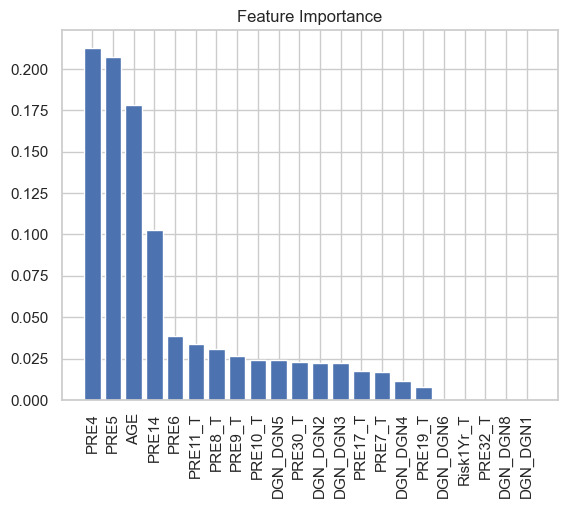

In [262]:
# trazimo znacajne podatke
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data2.columns[i] for i in indices]

pyplot.figure()

pyplot.title("Feature Importance")

pyplot.bar(range(data_train.shape[1]), importances[indices])

pyplot.xticks(range(data_train.shape[1]), names, rotation=90)

pyplot.show()


In [263]:

from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rf_classifier, threshold=th) 

    features_important = selector.fit_transform(data_train, target_train)

    test_important = selector.transform(data_test)

    randomForestModel = rf_classifier.fit(features_important,target_train)

    predRFC = randomForestModel.predict(test_important)
    res = accuracy_score(target_test, predRFC, normalize = True)
    print("RandomForest accuracy : ",res )
    results['random forest']['importance'] = res

selectFeaturesRF(0.032)



RandomForest accuracy :  0.7978723404255319


In [264]:

kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [265]:

# Kros-validacija
cv_results = cross_validate(rf_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("Random forest cross validation accuracy: ", cv_results['test_score'])
results['random forest']['cross'] =  np.mean(cv_results['test_score'])

Average Accuracy:  0.8468085106382979
Random forest cross validation accuracy:  [0.87234043 0.82978723 0.78723404 0.89361702 0.93617021 0.78723404
 0.87234043 0.72340426 0.85106383 0.91489362]


In [266]:

from sklearn.neighbors import KNeighborsClassifier

#dodati scaler
nearest_neighbors = KNeighborsClassifier(n_neighbors=8)

knn_model = nearest_neighbors.fit(data_train,target_train)

predNN = knn_model.predict(data_test)

res=nearest_neighbors.score(data_test, target_test)
print("KNeighbors accuracy : ", res)

results['knn']['basic'] = res


KNeighbors accuracy :  0.7978723404255319


In [267]:

# Kros-validacija
cv_results = cross_validate(knn_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("KNeighbors cross validation accuracy: ", cv_results['test_score'])
results['knn']['cross'] =  np.mean(cv_results['test_score'])

Average Accuracy:  0.8382978723404255
KNeighbors cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.89361702 0.95744681 0.78723404
 0.87234043 0.70212766 0.82978723 0.87234043]


In [268]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(random_state=0)
# Train model
lr_model = logistic_regression.fit(data_train, target_train)

pred_lr = lr_model.predict(data_test)

print("Logistic Regression : ",accuracy_score(target_test, pred_lr, normalize = True))

results['Logistic Regression']['basic'] = accuracy_score(target_test, pred_lr, normalize = True)


Logistic Regression :  0.8085106382978723


In [269]:

# Kros-validacija
cv_results = cross_validate(logistic_regression, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("LogisticRegression cross validation accuracy: ", cv_results['test_score'])


results['Logistic Regression']['cross'] = np.mean(cv_results['test_score'])


Average Accuracy:  0.8319148936170213
LogisticRegression cross validation accuracy:  [0.87234043 0.78723404 0.76595745 0.87234043 0.93617021 0.72340426
 0.87234043 0.72340426 0.87234043 0.89361702]


In [270]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC( C=1.0, random_state=0,  dual='auto')

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

results['LinearSVC']['basic'] = accuracy_score(target_test, pred_lr, normalize = True)

LinearSVC accuracy :  0.8085106382978723


In [271]:


# Kros-validacija
cv_results = cross_validate(svc_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("LinearSVC cross validation accuracy: ", cv_results['test_score'])

results['LinearSVC']['cross'] =  np.mean(cv_results['test_score'])

Average Accuracy:  0.8382978723404255
LinearSVC cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.87234043 0.93617021 0.74468085
 0.87234043 0.72340426 0.87234043 0.89361702]


In [272]:
# Naive Bayes
import numpy as np
from sklearn.naive_bayes import BernoulliNB

nb_classifer = BernoulliNB()
model = nb_classifer.fit(data_train, target_train).predict(data_test)

print("BernoulliNB : ",accuracy_score(target_test, model, normalize = True))

results['BernoulliNB']['basic'] = accuracy_score(target_test, model, normalize = True)


BernoulliNB :  0.7978723404255319


In [273]:


# Kros-validacija
cv_results = cross_validate(nb_classifer, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("BernoulliNB cross validation accuracy: ", cv_results['test_score'])

results['BernoulliNB']['cross'] = np.mean(cv_results['test_score'])


Average Accuracy:  0.8340425531914895
BernoulliNB cross validation accuracy:  [0.87234043 0.78723404 0.76595745 0.82978723 0.9787234  0.72340426
 0.87234043 0.72340426 0.85106383 0.93617021]


In [274]:
from sklearn.naive_bayes import GaussianNB
# Inicijalizacija i treniranje modela 
gnb_classifer = GaussianNB()
gnb_classifer.fit(data_train, target_train)

# Predikcija na test skupu
pred = gnb_classifer.predict(data_test)

# Evaluacija performansi modela
print("GaussianNB() accuracy:  ", (accuracy_score(target_test, pred, normalize = True)))
results['GaussianNB']['basic'] = accuracy_score(target_test, pred, normalize = True)

GaussianNB() accuracy:   0.20212765957446807


In [275]:


# Kros-validacija
cv_results = cross_validate(gnb_classifer, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("GaussianNB cross validation accuracy: ", cv_results['test_score'])

results['GaussianNB']['cross'] = np.mean(cv_results['test_score'])

Average Accuracy:  0.15957446808510636
GaussianNB cross validation accuracy:  [0.17021277 0.19148936 0.21276596 0.12765957 0.0212766  0.21276596
 0.10638298 0.27659574 0.19148936 0.08510638]


In [276]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ", accuracy_score(target_test, predDT, normalize = True))

knn_model = make_pipeline( DecisionTreeClassifier())
# Kros-validacija
cv_results = cross_validate(knn_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("Average Accuracy: ", np.mean(cv_results['test_score']))
print("DecisionTree cross validation accuracy: ", cv_results['test_score'])

results['DecisionTree']['cross'] = np.mean(cv_results['test_score'])
results['DecisionTree']['basic'] = accuracy_score(target_test, predDT, normalize = True)

DecisionTree accuracy :  0.7127659574468085
Average Accuracy:  0.7531914893617021
DecisionTree cross validation accuracy:  [0.78723404 0.65957447 0.72340426 0.72340426 0.85106383 0.68085106
 0.80851064 0.72340426 0.76595745 0.80851064]


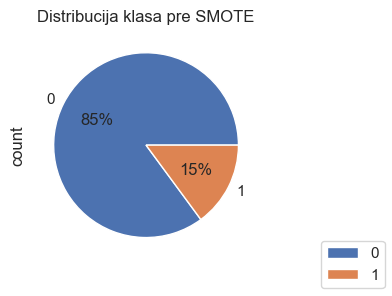

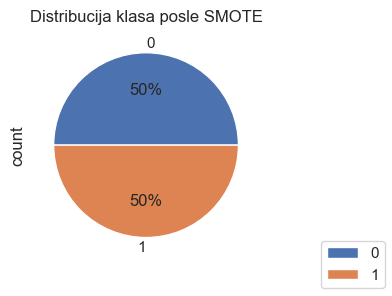

In [277]:
from imblearn.over_sampling import SMOTE

data_pre_smote = pd.DataFrame({'Class': target})
class_counts_pre_smote = data_pre_smote['Class'].value_counts()

pyplot.figure(figsize=(5, 3))
pie_pre_smote = class_counts_pre_smote.plot(kind='pie', autopct='%1.0f%%')
pie_pre_smote.figure.set_size_inches(5, 3)
pie_pre_smote.figure.legend(loc='lower right')
pyplot.title("Distribucija klasa pre SMOTE")
pyplot.show()

sm = SMOTE(random_state=2)
data_features_res, target_res = sm.fit_resample(data_features, target)

data_post_smote = pd.DataFrame({'Class': target_res})
class_counts_post_smote = data_post_smote['Class'].value_counts()

pyplot.figure(figsize=(5, 3))
pie_post_smote = class_counts_post_smote.plot(kind='pie', autopct='%1.0f%%')
pie_post_smote.figure.set_size_inches(5, 3)
pie_post_smote.figure.legend(loc='lower right')
pyplot.title("Distribucija klasa posle SMOTE")
pyplot.show()


In [278]:

data_train, data_test, target_train, target_test = train_test_split(data_features_res, target_res, test_size=0.2, random_state=10)


In [279]:
svc_model.fit(data_train, target_train)
# Predikcija na test skupu
pred = svc_model.predict(data_test)
# Evaluacija performansi modela
print("LinearSVC accuracy after SMOTE:  ", (accuracy_score(target_test, pred)))


rf_model.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)
print("random forest accuracy after SMOTE:  ", (accuracy_score(target_test, rf_pred)))

knn_model.fit(data_train, target_train)
predNN = rf_model.predict(data_test)
print("knn accuracy after SMOTE:  ", (accuracy_score(target_test, predNN)))

predDT = decisionTree.fit(data_train, target_train).predict(data_test)
print("decision tree accuracy after SMOTE:  ", (accuracy_score(target_test, predDT)))


BernoulliNB = nb_classifer.fit(data_train, target_train).predict(data_test)
print("nb accuracy after SMOTE:  ", (accuracy_score(target_test, BernoulliNB)))

lr_model = logistic_regression.fit(data_train, target_train)
pred_lr = lr_model.predict(data_test)
print("linear regression accuracy after SMOTE:  ", (accuracy_score(target_test, pred_lr)))

results['LinearSVC']['balanced'] =accuracy_score(target_test, pred)
results['random forest']['balanced'] =accuracy_score(target_test, rf_pred)
results['knn']['balanced'] =accuracy_score(target_test, predNN)
results['DecisionTree']['balanced'] =accuracy_score(target_test, predDT)
results['BernoulliNB']['balanced'] =accuracy_score(target_test, BernoulliNB)
results['Logistic Regression']['balanced'] =accuracy_score(target_test, pred_lr)

LinearSVC accuracy after SMOTE:   0.71875
random forest accuracy after SMOTE:   0.925
knn accuracy after SMOTE:   0.925
decision tree accuracy after SMOTE:   0.8375
nb accuracy after SMOTE:   0.675
linear regression accuracy after SMOTE:   0.725


In [280]:
pd.DataFrame.from_dict(results)

,knn,random forest,Logistic Regression,LinearSVC,BernoulliNB,GaussianNB,DecisionTree
basic,0.797872,0.797872,0.808511,0.808511,0.797872,0.202128,0.712766
cross,0.838298,0.846809,0.831915,0.838298,0.834043,0.159574,0.753191
balanced,0.925000,0.925000,0.725000,0.718750,0.675000,0.000000,0.837500
importance,NaN,0.797872,NaN,NaN,NaN,NaN,NaN


da li treba da se radi cross nakon balansiranja???